In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2

In [9]:
DATA_DIR = 'images'  # データディレクトリ
IMAGE_NAME = '画像水増しサンプル.jpeg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, '水増し画像アウトプットその1')  # 生成画像の保存先ディレクトリ
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）

In [10]:
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1,
                          save_to_dir=SAVE_DIR, save_prefix='うみねこ', save_format='jpeg'):
    i += 1
    if i == 10:
        break  # 停止しないと無限ループ

- パラメータ  
  - https://qiita.com/halspring/items/7692504afcba97ece249  
  - rotation_range: 整数。画像をランダムに回転する回転範囲（0-180）
  - width_shift_range: 浮動小数点数(横幅に対する割合)。指定した範囲内をランダムに水平シフトします。
  - height_shift_range: 浮動小数点数(縦幅に対する割合)。指定した範囲内をランダムに垂直シフトします。
  - shear_range: 浮動小数点数。シアー強度(反時計回りのシアー角度(ラジアン))。シアー変換を行います。簡単に説明すると指定した範囲内角度でランダムに引っ張ります。
  - zoom_range: 浮動小数点数または[lower，upper]。指定した値内の倍率でランダムにズームします。浮動小数点数が与えられた場合，[lower, upper] = [1-zoom_range, 1+zoom_range]です。
  - channel_shift_range: 浮動小数点数。範囲内でランダムにチャンネルをシフトします。色が変わります。
  - horizontal_flip: 真理値。水平方向に入力をランダムに反転させます。文字認識等には使ってはいけない禁忌の設定です。
  - vertical_flip: 真理値。垂直方向に入力をランダムに反転させます。文字認識等には使ってはいけない禁忌の設定です。


In [11]:
datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        channel_shift_range=0,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [17]:
def createImages(datagen,save_dir,file_prefix):
    if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1,
                              save_to_dir=save_dir, save_prefix=file_prefix, save_format='jpeg'):
        i += 1
        if i == 10:
            break

In [14]:
# createImages(datagen,"うみねこ2")

In [19]:
datagen = ImageDataGenerator(
        rotation_range=180,
)

In [20]:
SAVE_DIR = os.path.join(DATA_DIR, '水増し画像アウトプットその4')
createImages(datagen,SAVE_DIR,"うみねこ4")

- 色が変わってしまう問題

In [21]:
datagen = ImageDataGenerator(
        rotation_range=180,
)

In [22]:
datagen

In [23]:
img_array

array([[[[29, 43, 72],
         [29, 43, 72],
         [31, 42, 72],
         ...,
         [29, 48, 83],
         [28, 47, 82],
         [26, 46, 81]],

        [[27, 41, 70],
         [27, 41, 70],
         [29, 40, 70],
         ...,
         [29, 45, 81],
         [27, 46, 81],
         [25, 45, 80]],

        [[29, 41, 69],
         [29, 41, 69],
         [29, 41, 69],
         ...,
         [28, 45, 78],
         [25, 44, 77],
         [24, 43, 76]],

        ...,

        [[ 8,  4, 29],
         [ 8,  4, 29],
         [ 8,  4, 29],
         ...,
         [ 3,  6,  4],
         [16, 19, 17],
         [ 7, 10,  8]],

        [[ 7,  4, 26],
         [ 7,  4, 26],
         [ 7,  4, 26],
         ...,
         [13, 16, 14],
         [16, 19, 17],
         [18, 21, 19]],

        [[ 7,  4, 26],
         [ 7,  4, 26],
         [ 7,  4, 26],
         ...,
         [13, 16, 14],
         [16, 19, 17],
         [18, 21, 19]]]], dtype=uint8)

In [30]:
DATA_DIR = 'images'  # データディレクトリ
IMAGE_NAME = '画像水増しサンプル.jpeg'  # 対象画像ファイル
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み

In [26]:
import matplotlib.pyplot as plt

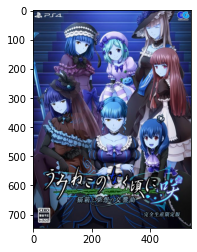

In [29]:
plt.imshow(img_array)

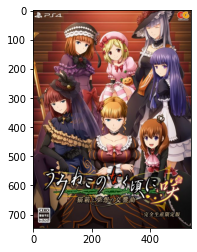

In [31]:
# BGR から RGB に変更すりゃええ
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [ ]:
DATA_DIR = 'images'  # データディレクトリ
IMAGE_NAME = '画像水増しサンプル.jpeg'  # 対象画像ファイル


img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）